# Mitsuba Image Processing

An exploratory notebook about Mitsuba image processing.

A companion Google Colab Notebook for spectral image rendering is available at this [url](https://colab.research.google.com/drive/1Z0BE49o9cbr7235kDs4VKijNwJl8jZsj).

The final images are hosted at this [url](https://academy-vwg-gm-mitsuba-spectral-images.imfast.io).

More information is available on [ACEScentral](https://acescentral.com/c/aces-development-acesnext/vwg-aces-gamut-mapping-working-group/).

*TODO*:

*

In [0]:
#@title Global Parameters

ILLUMINANT = 'Daylight FL' #@param ['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA-100/DX (Mercury DX)', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HPS', 'ID50', 'ID65', 'Incandescent', 'Kinoton 75P', 'LED-B1', 'LED-B2', 'LED-B3', 'LED-B4', 'LED-B5', 'LED-BH1', 'LED-RGB1', 'LED-V1', 'LED-V2', 'LPS', 'Luxeon WW 2880', 'MHC100/U/MP /3K', 'MHC100/U/MP /4K', 'Mercury', 'Metal Halide', 'Natural', 'Neodimium Incandescent', 'PHOS-1', 'PHOS-2', 'PHOS-3', 'PHOS-4', 'Philips TL-84', 'Phosphor LED YAG', 'SA', 'SC', 'SDW-T 100W/LV (Super HPS)', 'Super HPS', 'T8 Luxline Plus White', 'T8 Polylux 3000', 'T8 Polylux 4000', 'Thorn Kolor-rite', 'Triphosphor FL']

## Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
OUTPUT_DIRECTORY = '/content/drive/My Drive/Fast.io/academy-vwg-gm-mitsuba-spectral-images.imfast.io'

## colour-science Requirements

In [0]:
!pip install colour-datasets

!python -c "import imageio;imageio.plugins.freeimage.download()"

!pip uninstall -y colour-science
!if [ -d "colour" ]; then rm -rf colour; fi
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout feature/idt && git pull && cd ..; fi

import sys
sys.path.append('colour')

!mkdir -p /content/downloads

  Using cached https://files.pythonhosted.org/packages/2e/b8/a25564da5f41a2d349afb3e95f8c5d7007231450bacf433a92301b073070/colour_science-0.3.15-py2.py3-none-any.whl
Uninstalling colour-science-0.3.15:
  Successfully uninstalled colour-science-0.3.15
Cloning into 'colour'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 41769 (delta 17), reused 32 (delta 14), pack-reused 41720
Receiving objects: 100% (41769/41769), 109.27 MiB | 37.61 MiB/s, done.
Resolving deltas: 100% (31821/31821), done.
Branch 'feature/idt' set up to track remote branch 'feature/idt' from 'origin'.
Switched to a new branch 'feature/idt'
Already up to date.


In [0]:
import colour
import colour_datasets
import colour.plotting
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import textwrap
from IPython.display import HTML, display
from copy import deepcopy

colour.plotting.colour_style()

plt.style.use({'figure.figsize': (19.20, 10.80)})

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.6.9 (default, Nov  7 2019, 10:44:02)                       *
*                [GCC 8.3.0]                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.3.15-68-ge2cab159                                         *
*       colour-datasets : 0.1.0                                               *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.4.1                                                       *
*       matplotlib : 3.2.1                                                    *
*       networkx : 2.4                  

## Utility Objects

In [0]:
def slugify(a):
    return re.sub(r'\s|-|\.', '_',
                  re.sub(r'(?u)[^-\w.]', ' ',
                         str(a).strip()).strip())


def html_format_matrix(M, precision=10):
    M = np.atleast_2d(colour.utilities.as_float_array(M))

    html = '<table class="matrix-table">'
    shape = M.shape
    for i in range(shape[0]):
        html += '<tr class="matrix-row">'
        for j in range(shape[1]):
            v = M[i][j]
            pretty = '{{: 0.{}f}}'.format(precision).format(
                v) if precision is not None else v
            html += '<td class="matrix-column">{0}</td>'.format(pretty)
        html += '</tr>'
    html += '</table>'

    return html


def set_css_in_cell_output():
  display(HTML(
"""
<style>
    body {
        background-color: white !important;
    }

    .table, .matrix-table {
        width: 100%
    }

    .table-row-header, .table-data-header {
        background-color: #aaa !important;
        color: #fff !important;
        font-weight: bold !important;
        text-align: center
    }

    .vertical-align-top {
        vertical-align: top
    }

    .text-align-center {
        text-align: center
    }

    .table-row-odd {
        background-color: #eee !important;
    }

    .matrix-table, .matrix-row, .matrix-column {
        border: none
        text-align: center
    }

    .table, .table-canton, .table-row-header-group, .table-row-header, .table-data-header, .table-row, .table-data {
        border-color: #fff
    }
</style>
"""))


get_ipython().events.register('pre_run_cell', set_css_in_cell_output)

## Emitters Datasets

In [0]:
EMITTER_DATABASE = deepcopy(colour.ILLUMINANT_SDS)
EMITTER_DATABASE.update(colour.LIGHT_SOURCE_SDS)

EMITTER_NAMES = sorted(EMITTER_DATABASE.keys())

print(EMITTER_NAMES)

['3-LED-1 (457/540/605)', '3-LED-2 (473/545/616)', '3-LED-2 Yellow', '3-LED-3 (465/546/614)', '3-LED-4 (455/547/623)', '4-LED No Yellow', '4-LED Yellow', '4-LED-1 (461/526/576/624)', '4-LED-2 (447/512/573/627)', '60 A/W (Soft White)', 'A', 'B', 'C', 'C100S54 (HPS)', 'C100S54C (HPS)', 'Cool White FL', 'D50', 'D55', 'D60', 'D65', 'D75', 'Daylight FL', 'E', 'F32T8/TL830 (Triphosphor)', 'F32T8/TL835 (Triphosphor)', 'F32T8/TL841 (Triphosphor)', 'F32T8/TL850 (Triphosphor)', 'F32T8/TL865 /PLUS (Triphosphor)', 'F34/CW/RS/EW (Cool White FL)', 'F34T12/LW/RS /EW', 'F34T12WW/RS /EW (Warm White FL)', 'F40/C50 (Broadband FL)', 'F40/C75 (Broadband FL)', 'F40/CWX (Broadband FL)', 'F40/DX (Broadband FL)', 'F40/DXTP (Delux FL)', 'F40/N (Natural FL)', 'FL1', 'FL10', 'FL11', 'FL12', 'FL2', 'FL3', 'FL3.1', 'FL3.10', 'FL3.11', 'FL3.12', 'FL3.13', 'FL3.14', 'FL3.15', 'FL3.2', 'FL3.3', 'FL3.4', 'FL3.5', 'FL3.6', 'FL3.7', 'FL3.8', 'FL3.9', 'FL4', 'FL5', 'FL6', 'FL7', 'FL8', 'FL9', 'H38HT-100 (Mercury)', 'H38JA

## Cameras Sensitivites Datasets

In [0]:
print(colour_datasets.datasets())

colour-science-datasets

Datasets : 16
Synced   : 2
URL      : https://zenodo.org/communities/colour-science-datasets/

Datasets
--------

[ ] 3269926 : Agfa IT8.7/2 Set
[x] 3245883 : Camera Spectral Sensitivity Database
[ ] 3367463 : Constant Hue Loci Data
[ ] 3362536 : Constant Perceived-Hue Data
[ ] 3270903 : Corresponding-Colour Datasets
[ ] 3269920 : Forest Colors
[ ] 3245875 : Labsphere SRS-99-020
[ ] 3269924 : Lumber Spectra
[ ] 3269918 : Munsell Colors Glossy (All) (Spectrofotometer Measured)
[ ] 3269916 : Munsell Colors Glossy (Spectrofotometer Measured)
[ ] 3269914 : Munsell Colors Matt (AOTF Measured)
[ ] 3269912 : Munsell Colors Matt (Spectrofotometer Measured)
[ ] 3245895 : New Color Specifications for ColorChecker SG and Classic Charts
[ ] 3252742 : Observer Function Database
[ ] 3269922 : Paper Spectra
[x] 3372171 : RAW to ACES Utility Data


In [0]:
# Fujifilm X-T2 sensitivities courtesy Prof. Dr. Jan Fröhlich.
FUJIFILM_XT2_SENSITIVITIES = {
    380: (-0.0000850511, 0.0000507283, 0.0001182680),
    385: (0.0017391753, 0.0015664783, 0.0030663904),
    390: (0.0018391639, 0.0013485245, 0.0056839334),
    395: (0.0020047764, 0.0018898209, 0.0077782905),
    400: (0.0024319499, 0.0023503233, 0.0152484840),
    405: (0.0037214138, 0.0042017956, 0.0317564811),
    410: (0.0040661443, 0.0059389581, 0.0461115021),
    415: (0.0050188542, 0.0103283912, 0.0885883564),
    420: (0.0141641162, 0.0446775540, 0.4678504332),
    425: (0.0289368226, 0.1097150931, 1.2736648204),
    430: (0.0229998057, 0.1218555473, 1.5379422148),
    435: (0.0176522587, 0.1491990644, 1.7056632831),
    440: (0.0144726504, 0.1867968184, 1.8400450934),
    445: (0.0107464186, 0.2150155985, 1.9834635737),
    450: (0.0088648711, 0.2162266003, 2.0580732061),
    455: (0.0085491319, 0.2054437144, 2.0638934415),
    460: (0.0086964157, 0.2537927934, 2.0888061940),
    465: (0.0108394895, 0.4036712359, 2.1216650752),
    470: (0.0135633997, 0.6631781839, 2.1256474514),
    475: (0.0179550003, 1.0833786199, 2.1211476773),
    480: (0.0237812140, 1.5477386938, 2.0495970465),
    485: (0.0262252044, 1.7972822569, 1.8982666094),
    490: (0.0294250769, 1.9944333531, 1.7210776896),
    495: (0.0333635172, 2.1511102005, 1.5656151922),
    500: (0.0396168375, 2.2832808494, 1.3762479591),
    505: (0.0469268560, 2.4023283963, 1.1893304997),
    510: (0.0572103232, 2.5511047707, 0.9961925946),
    515: (0.0713868116, 2.6287493779, 0.8197455273),
    520: (0.0836021073, 2.6545130596, 0.6435621628),
    525: (0.0924338183, 2.6419193878, 0.5077499176),
    530: (0.0963773110, 2.6712565485, 0.4116406265),
    535: (0.0950553314, 2.6615841643, 0.3370802508),
    540: (0.0931732510, 2.5982098046, 0.2759953966),
    545: (0.0924634463, 2.5699888001, 0.2121870833),
    550: (0.0944520009, 2.4783817927, 0.1535785534),
    555: (0.1028024209, 2.3719940255, 0.1080085899),
    560: (0.1167127364, 2.2914320681, 0.0759132103),
    565: (0.1392658710, 2.1507480937, 0.0542478591),
    570: (0.2036891001, 2.0062697844, 0.0403866321),
    575: (0.4826071157, 1.8869681524, 0.0337911448),
    580: (1.1421720720, 1.7063756982, 0.0290716955),
    585: (1.7513548729, 1.5136504485, 0.0258337436),
    590: (1.9912121898, 1.3231483525, 0.0218989884),
    595: (2.0280314847, 1.1049710654, 0.0187962862),
    600: (2.0285918274, 0.8849117960, 0.0160717365),
    605: (1.9394389960, 0.6758881114, 0.0130994892),
    610: (1.7930618254, 0.4994530474, 0.0110792449),
    615: (1.6962768127, 0.3682860185, 0.0110615757),
    620: (1.6297477439, 0.2807688931, 0.0112705333),
    625: (1.5457506148, 0.2243510637, 0.0125268388),
    630: (1.4590434578, 0.1858814155, 0.0136028671),
    635: (1.3694020846, 0.1572222269, 0.0151973750),
    640: (1.2590686946, 0.1319731733, 0.0168792374),
    645: (1.1587083458, 0.1093771148, 0.0189046647),
    650: (1.0968367497, 0.0925126597, 0.0215228256),
    655: (1.0284329906, 0.0811408119, 0.0241990380),
    660: (0.9199238968, 0.0751469182, 0.0263396877),
    665: (0.8089567874, 0.0740249302, 0.0268489155),
    670: (0.7410715904, 0.0794581154, 0.0272828488),
    675: (0.6530452201, 0.0854697297, 0.0264080431),
    680: (0.4691569675, 0.0762769868, 0.0200047025),
    685: (0.2726319437, 0.0559628152, 0.0132758753),
    690: (0.1474833504, 0.0361475626, 0.0073368266),
    695: (0.0838719140, 0.0232583145, 0.0041905597),
    700: (0.0495969245, 0.0148939268, 0.0023401688),
    705: (0.0508611613, 0.0152692357, 0.0024024764),
    710: (0.0275162807, 0.0086920249, 0.0011455218),
    715: (0.0182886806, 0.0059500079, 0.0006282180),
    720: (0.0141230590, 0.0041396701, -0.0001967192),
    725: (0.0108287418, 0.0032726525, 0.0001009021),
    730: (0.0070269151, 0.0016909734, -0.0004938016),
    735: (0.0064099811, 0.0018393029, -0.0000322150),
    740: (0.0059408997, 0.0013489824, -0.0005827746),
    745: (0.0048495041, 0.0014616363, -0.0000900026),
    750: (0.0126660573, 0.0040132707, -0.0004361908),
    755: (0.0054878043, 0.0017572947, -0.0006635022),
    760: (-0.0010269703, -0.0018653584, -0.0027123156),
    765: (0.0026327462, 0.0007082691, -0.0007148143),
    770: (-0.0003658680, -0.0016082711, -0.0028283335),
    775: (0.0007704984, 0.0000952247, -0.0009148115),
    780: (0.0002937840, -0.0000545454, -0.0008717080)
}

ADDITIONAL_CAMERA_SENSITIVITIES_DATABASE = {
    'Fujifilm X-T2':
    colour.characterisation.RGB_SpectralSensitivities(
        FUJIFILM_XT2_SENSITIVITIES, name='Fujifilm X-T2'),
    'ACES RICD':
    colour.characterisation.ACES_RICD,
}

In [0]:
CAMERA_SENSITIVITIES_DATABASE = colour_datasets.load(
    'Camera Spectral Sensitivity Database')
AMPAS_CAMERA_SENSITIVITIES_DATABASE = colour_datasets.load(
    'RAW to ACES Utility Data')

TRAINING_DATA = AMPAS_CAMERA_SENSITIVITIES_DATABASE['training']['190-patch']

COMPOSITE_CAMERA_SENSITIVITIES_DATABASE = deepcopy(
    CAMERA_SENSITIVITIES_DATABASE)
COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.update(
    deepcopy(AMPAS_CAMERA_SENSITIVITIES_DATABASE['camera']))
COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.update(
    deepcopy(ADDITIONAL_CAMERA_SENSITIVITIES_DATABASE))

CAMERA_NAMES = sorted(COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.keys())

print(CAMERA_NAMES)

SLUGGIFIED_CAMERA_NAMES = {
    slugify(camera_name): camera_name
    for camera_name in CAMERA_NAMES
}

['ACES RICD', 'Canon 1DMarkIII', 'Canon 20D', 'Canon 300D', 'Canon 40D', 'Canon 500D', 'Canon 50D', 'Canon 5DMarkII', 'Canon 600D', 'Canon 60D', 'Fujifilm X-T2', 'Hasselblad H2', 'Nikon D200', 'Nikon D3', 'Nikon D300s', 'Nikon D3X', 'Nikon D40', 'Nikon D50', 'Nikon D5100', 'Nikon D700', 'Nikon D80', 'Nikon D90', 'Nokia N900', 'Olympus E-PL2', 'Pentax K-5', 'Pentax Q', 'Phase One', 'Point Grey Grasshopper 50S5C', 'Point Grey Grasshopper2 14S5C', 'SONY NEX-5N', 'arri d21', 'canon eos 5d mark ii', 'canon powershot s90', 'canon xti', 'nikon d200', 'nikon d5100', 'nikon d70', 'nikon d700', 'nikon d7000', 'sony ilce-7rm2', 'sony ilce-7sm2']


## Camera Sensitivities Normalisation

CMFS & Camera Sensitivities Normalisation Factors
"CIE 1931 2 Degree Standard Observer": [ 1.00007817  1.          1.00034117]
"Canon 1DMarkIII": [ 0.4643693  1.         0.7515508]
"Canon 20D": [ 0.53492694  1.          0.65663821]
"Canon 300D": [ 0.51365973  1.          0.94518052]
"Canon 40D": [ 0.45873856  1.          0.76156072]
"Canon 500D": [ 0.49424391  1.          0.79044306]
"Canon 50D": [ 0.48288578  1.          0.81077445]
"Canon 5DMarkII": [ 0.51226291  1.          0.63354197]
"Canon 600D": [ 0.44912477  1.          0.6853175 ]
"Canon 60D": [ 0.45252825  1.          0.71799655]
"Hasselblad H2": [ 0.3939756   1.          1.00023554]
"Nikon D3X": [ 0.4586101   1.          0.76026313]
"Nikon D200": [ 0.58071958  1.          0.72940151]
"Nikon D3": [ 0.55525235  1.          0.78156171]
"Nikon D300s": [ 0.66096129  1.          0.83936663]
"Nikon D40": [ 0.46573036  1.          0.78634668]
"Nikon D50": [ 0.46014445  1.          0.77977596]
"Nikon D5100": [ 0.50478011  1.         

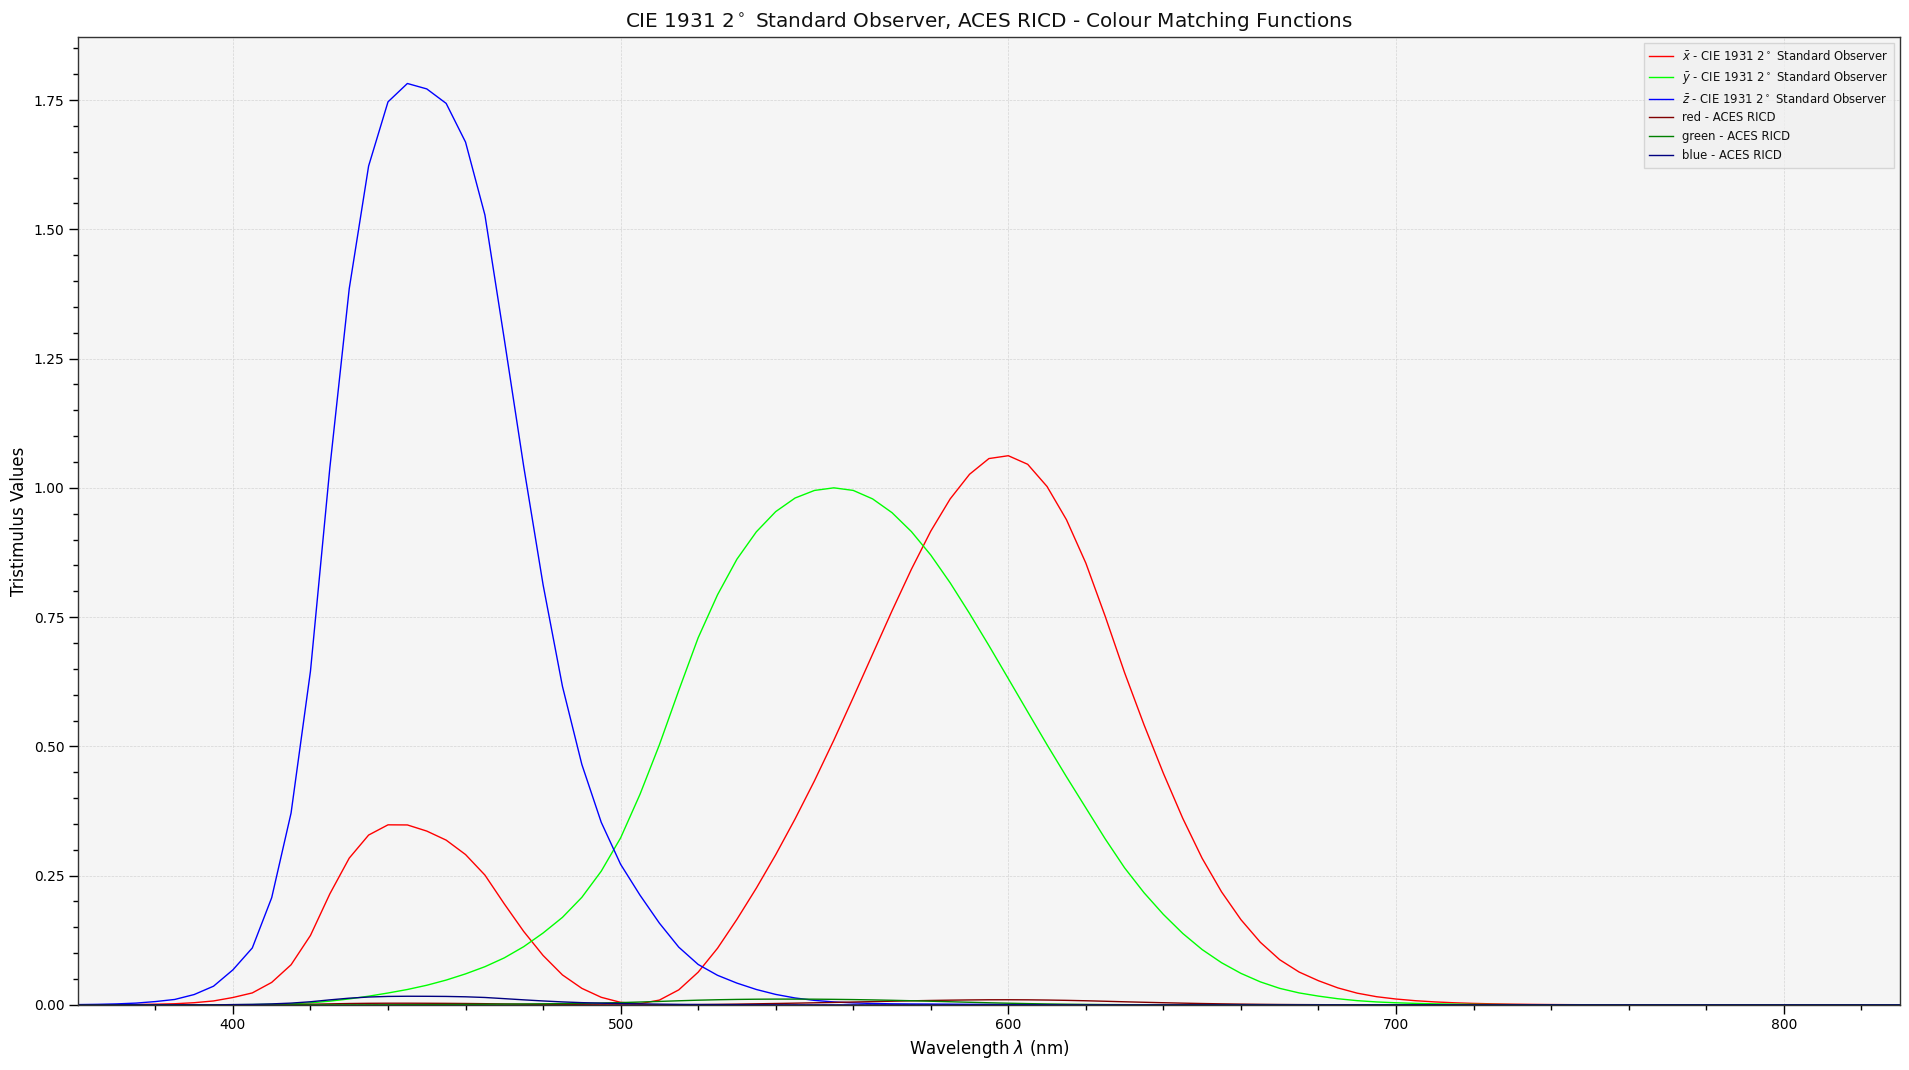

In [0]:
SHAPE = colour.SpectralShape(400, 700, 5)
MITSUBA_SHAPE = colour.SpectralShape(360, 830, 5)


def normalise_multi_signal(multi_signal):
    multi_signal = multi_signal.copy()

    f_n = colour.sd_to_XYZ(colour.sd_ones(), cmfs=multi_signal) / 100
    print('"{0}": {1}'.format(multi_signal.name, f_n))
    multi_signal.values = multi_signal.values / f_n

    return multi_signal


print('CMFS & Camera Sensitivities Normalisation Factors')
INTERPOLATOR = colour.LinearInterpolator
EXTRAPOLATOR_KWARGS = {'right': 0, 'left': 0, 'method': 'constant'}

CMFS_NAME = 'CIE 1931 2 Degree Standard Observer'
CMFS = normalise_multi_signal(colour.CMFS[CMFS_NAME].copy().align(MITSUBA_SHAPE))

COMPOSITE_CAMERA_SENSITIVITIES_DATABASE = {
    name: normalise_multi_signal(sensitivities.copy().align(
        SHAPE).align(MITSUBA_SHAPE, extrapolator_kwargs=EXTRAPOLATOR_KWARGS))
    for name, sensitivities in COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.items()
}

colour.plotting.plot_multi_cmfs(
    [CMFS, COMPOSITE_CAMERA_SENSITIVITIES_DATABASE[CAMERA_NAMES[0]]]);

## IDT Matrices

In [0]:
ILLUMINANT_SD = EMITTER_DATABASE[ILLUMINANT]

M_IDT = {
    camera: colour.idt_matrix(sensitivities, ILLUMINANT_SD, CMFS)
    for camera, sensitivities in
    COMPOSITE_CAMERA_SENSITIVITIES_DATABASE.items()
}


def html_format_pseudo_idt_matrices(M_IDT):
    html = ('<table class="table">'
            '<thead class="table-header">'
            '<tr class="table-row-header-group">'
            '<th class="table-canton"></th>'
            '<th class="table-row-header">Illuminant ({0})</th>'
            '</tr>'
            '</thead>'
            '<tbody>'.format(ILLUMINANT))
    for i, (camera_name, M) in enumerate(M_IDT.items()):
        html += '<tr class="table-row {0}">'.format('table-row-odd' if i %
                                                    2 == 0 else '')
        html += '<td class="table-data-header">{0}</td>'.format(camera_name)
        html += '<td class="table-data">{0}</td>'.format(
            html_format_matrix(M))
        html += '</tr>'
    html += ('<tbody>' '</table>')

    return html


HTML(
    html_format_pseudo_idt_matrices(
        {camera_name: M_IDT[camera_name]
         for camera_name in CAMERA_NAMES}))


## Camera Data Rendering

In [0]:
XYZ_IMAGES = sorted(glob.glob('{0}/*_XYZ.exr'.format(
    '{0}/images'.format(OUTPUT_DIRECTORY))))


XYZ_IMAGE_TO_CAMERA_NAME = {}
for image in XYZ_IMAGES:
    for sluggified_camera_name in SLUGGIFIED_CAMERA_NAMES:
        if sluggified_camera_name in image:
            XYZ_IMAGE_TO_CAMERA_NAME[image] = (
                SLUGGIFIED_CAMERA_NAMES[sluggified_camera_name])
            break


def render_mitsuba_image(
        XYZ_image,
        title,
        idt_matrix=None,
        working_RGB_colourspace=colour.RGB_COLOURSPACES['ACES2065-1'],
        display_RGB_colourspace=colour.RGB_COLOURSPACES['sRGB'],
        chromaticity_diagram_RGB_colourspaces=['ACES2065-1', 'ACEScg'],
        RGB_chromaticities_in_chromaticity_diagram_callable=(
            colour.plotting.plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS),
        normalisation_region=(slice(490, 522, 1), slice(530, 562, 1))):

    XYZ = colour.read_image(XYZ_image)

    if idt_matrix is not None:
        RGB_W = colour.utilities.dot_vector(idt_matrix, XYZ)
    else:
        RGB_W = colour.XYZ_to_RGB(
            XYZ,
            working_RGB_colourspace.whitepoint,
            working_RGB_colourspace.whitepoint,
            working_RGB_colourspace.XYZ_to_RGB_matrix
        )

    RGB_N = np.mean(
        RGB_W[normalisation_region].reshape([-1, 3]), axis=0)
    Y = colour.RGB_luminance(
        RGB_N,
        working_RGB_colourspace.primaries,
        working_RGB_colourspace.whitepoint)
    
    RGB_W /= Y
    RGB_W *= 0.19

    colour.write_image(
        RGB_W,
        XYZ_image.replace('_XYZ.exr', '_RGB_W.exr'))

    RGB_D = colour.RGB_to_RGB(
        RGB_W,
        working_RGB_colourspace,
        display_RGB_colourspace)
    
    colour.write_image(
        RGB_D,
        XYZ_image.replace('_XYZ.exr', '_RGB_D.exr'))

    colour.plotting.plot_image(colour.cctf_encoding(RGB_D))
    RGB_chromaticities_in_chromaticity_diagram_callable(
        RGB_D,
        colourspaces=chromaticity_diagram_RGB_colourspaces,
        diagram_opacity=0.25,
        title=title,
        scatter_kwargs={'s': 15},
        filename=XYZ_image.replace('_XYZ.exr', '_Diagram.png'))


for image in XYZ_IMAGES:
    if 'CIE_1931_2_Degree_Standard_Observer' in image:
        render_mitsuba_image(image, CMFS.name)
    else:
        camera_name = XYZ_IMAGE_TO_CAMERA_NAME[image]
        render_mitsuba_image(image, camera_name, M_IDT[camera_name])

## Served Content

In [0]:
JS_JERI_CAMERA_DATA_TEMPLATE = """
const cameraData = {{
    title: 'root',
    children: [{camera_data}
    ]
}};"""[1:]

JS_JERI_CAMERA_TEMPLATE = """
{{
    title: '{camera_name}',
    children: [
        {{
            title: 'Render',
            image: 'images/{camera_image}',
        }},
        {{
            title: 'MRSE',
            lossMap: {{
                'function': 'MRSE',
                imageA: 'images/{observer_image}',
                imageB: 'images/{camera_image}'
            }}
        }},
        {{
            title: 'CIE 1976 UCS Chromaticity Diagram',
            image: 'images/{diagram_image}',
        }}
    ]
}},"""
    

def generate_js_camera_payload(XYZ_images, output_directory=OUTPUT_DIRECTORY):
    observer_image = None
    for image in XYZ_images:
        if 'CIE_1931_2_Degree_Standard_Observer' in image:
            observer_image = os.path.basename(image)
            break

    camera_data = textwrap.indent(JS_JERI_CAMERA_TEMPLATE.format(
        **{
            'camera_name': 'Observer',
            'camera_image': observer_image.replace('_XYZ.exr', '_RGB_D.exr'),
            'observer_image': observer_image,
            'diagram_image': observer_image.replace('_XYZ.exr', '_Diagram.png'),
        }), 8 * ' ')

    for image in XYZ_images:
        if 'CIE_1931_2_Degree_Standard_Observer' in image:
            continue

        camera_image = os.path.basename(image)
        camera_data += textwrap.indent(JS_JERI_CAMERA_TEMPLATE.format(
            **{
                'camera_name': XYZ_IMAGE_TO_CAMERA_NAME[image],
                'camera_image': camera_image.replace('_XYZ.exr', '_RGB_D.exr'),
                'observer_image': observer_image,
                'diagram_image': camera_image.replace('_XYZ.exr', '_Diagram.png'),
            }), 8 * ' ')

    with open('{0}/mitsuba-cornell-box-rigid-spheres.js'.format(
        output_directory), 'w') as js_camera_payload:
        js_camera_payload.write(
            JS_JERI_CAMERA_DATA_TEMPLATE.format(
                **{'camera_data': camera_data}))
        
generate_js_camera_payload(XYZ_IMAGES)